# GLM

## Data preparation

We will use the diabetes data set from the `sklearn` library for the following three exercises.

1. Loading the data
    - The code for loading the dataset is already provided. Look at the [documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_diabetes.html) of the `load_diabetes()` function to familiarize yourself with the function and its outputs.
    - Use the `DESCR` attribute of the data set to get its description. Understand the variables, their meanings, and how they relate to the medical context (e.g., what each feature like BMI, age, and blood pressure represents in the context of diabetes).

2. Preparing the data
    - Rename the `target` column of the to `diabetes` by using the `.rename()` method of the DataFrame. Search for its documentation if you are unsure how to use it.
    - Print the DataFrame for visual inspection.

*Hints:*
- *If you're using a local Python installation, you will need to install some packages:`pip install scikit-learn seaborn pingouin`. Make sure to install them in the `psy111` environment*
- *If you are using Goolge Colab, you only need to install the pingouin package by creating a code cell at the top of the script and writing: `!pip install pingouin`.* 
- *If you're using a Jupyter Notebook, make sure to select any of "View as a scrollable element or open in a text editor" at the bottom of the output to see the entire description.*

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pingouin as pg
from sklearn import datasets

In [ ]:
# 1. Load the data
diabetes = datasets.load_diabetes(as_frame=True)
diabetes_df = diabetes.frame
print(diabetes.DESCR)

# 2. Preparing the data
diabetes_df.rename(columns={'target': 'diabetes'}, inplace=True)
print(diabetes_df.head())

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## Exercise 1: Multiple linear regression

1. Estimate a *multiple linear regression model* using `bmi`, `bp`, and `s5` to predict diabetes progression (`diabetes`).
2. Estimate a second model with different predictors.
2. Compare the models. What is their *R-squared value*? What does it tell you about the performance of the models?

*Tip: When working in Jupyter Notebooks, it might make sense to put different models/computations in separate code cells, so they can be evaluated individually and the outputs are easier to read.*

In [6]:
model = smf.ols(formula='diabetes ~ bmi + bp + s5', data=diabetes_df)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     134.8
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           7.16e-62
Time:                        16:01:54   Log-Likelihood:                -2402.6
No. Observations:                 442   AIC:                             4813.
Df Residuals:                     438   BIC:                             4830.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.653     57.342      0.0

In [7]:
model2 = smf.ols(formula='diabetes ~ sex + s1 + s6', data=diabetes_df)
results2 = model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     26.99
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           4.93e-16
Time:                        16:01:54   Log-Likelihood:                -2509.7
No. Observations:                 442   AIC:                             5027.
Df Residuals:                     438   BIC:                             5044.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      3.380     45.006      0.0

## Exercise 2: Correlations

1. Correlations
    - Compute the correlation matrix for all columns in the data
    - Print the shape of the correlation matrix. What shape does it have, and why?

2. Visualizing the data
    - Plot the correlation matrix by using `seaborn`'s `heatmap()` function. The plot should have the following featurees:
        - The cells in the plot should be annotated with the correlation values
        - The colormap should be `"coolwarm"` (it's a good choice for correlation values)
        - The colorbar should range from `-1` to `1` (because this is the full range correlation values can take)
        - The cells in the plot should be quare (just because it looks nice)
        - The cells should be separated with lines of width `1` (also because it looks nice)
    -  Throug visual inspection, identify the variable that shows the highest correlation (positive or negative) with the target variable (diabetes progression)

Shape of the correlation matrix: (11, 11)


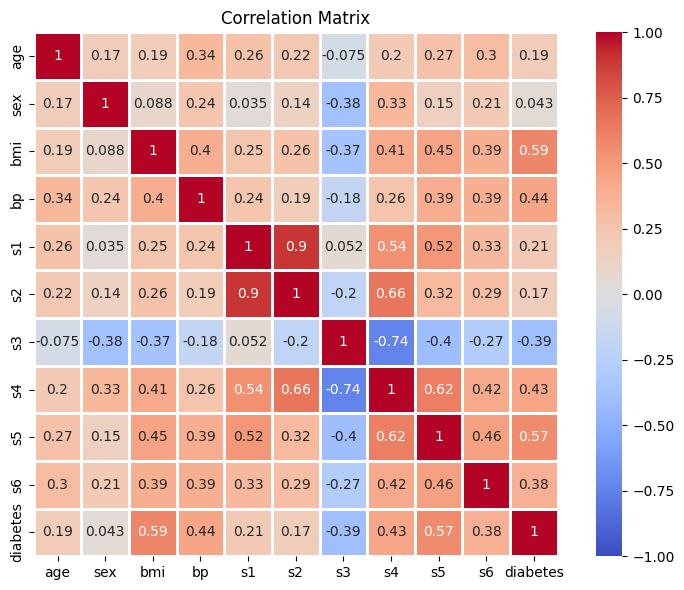

In [8]:
# 1. Correlations
correlation_matrix = diabetes_df.corr()
print("Shape of the correlation matrix:", correlation_matrix.shape)

# 2. Visualizing the data
plt.figure(figsize=(8,6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=1
)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Exercise 3: Partial Correlation

Age could be influencing both BMI and diabetes progression. As people age, both their BMI and risk for diabetes may increase, potentially inflating the observed correlation between BMI and diabetes progression. By holding age constant, we can test whether the relationship between BMI and diabetes progression persists independently of age.

Hypothesis:

- Null Hypothesis ($H_0$​): There is no relationship between BMI and diabetes progression after controlling for age.
- Alternative Hypothesis ($H_1$​): There is a relationship between BMI and diabetes progression, even after controlling for age.

Tasks:

- Use the `pingouin` library to calculate the partial correlation between BMI and diabetes progression, controlling for age.
- Compare the partial correlation coefficient to the original Pearson correlation coefficient. Did the correlation decrease after accounting for age? What does this suggest about age as a confounding factor?


In [9]:
partial_corr = pg.partial_corr(data=diabetes_df, x='bmi', y='diabetes', covar='age')
pearson_corr = diabetes_df['bmi'].corr(diabetes_df['diabetes'])

print(partial_corr)
print("\nNormal pearson correlation:", pearson_corr)

# Interpretation:
# After controlling for age, the relationship between BMI and diabetes progression persists, though it is slightly weaker. 
# This suggests that while age has some influence, BMI remains a significant predictor of diabetes progression.

           n         r         CI95%         p-val
pearson  442  0.571553  [0.51, 0.63]  1.309246e-39

Normal pearson correlation: 0.5864501344746885


## Voluntary exercise 1: Data wrangling

We have previously loaded the diabetes dataset with the `as_frame=True` argument. If we do not specify this argument, the combined DataFrame will not be provided, but rather the data, target, and labels will be returned separately.

1. Familiarize yourself with the returns of the `load_diabetes()`function.
2. What kind of data types are the data, target, and labels?
3. Manually create the joint DataFrame by combining the data, target, and labels.
4. Verify that your operations were succesful (e.g. by printing the joint DataFrame).

*Hint: There are multiple ways for creating a joint DataFrame. Have a look at section 5.2 if you need a refresher. You could, for example, join two DataFrames/Serier, or you could just add a new column to an existing DataFrame. Feel free to experiment! :)*


In [10]:
# Voluntary exercise 1
dataset = datasets.load_diabetes()

# Get observations matrix (X) and target vector (y)
X, y, names = dataset.data, dataset.target, dataset.feature_names

# Option 1: Create a DataFrame and Series object from the numpy arrays and concatenate them
X_df= pd.DataFrame(X, columns=dataset.feature_names)
y_series = pd.Series(y, name="diabetes")
df1 = pd.concat([X_df, y_series], axis=1)
print(df1.head())
print("\n")

# Option 2: Create a DataFrame and append the diabetes column
df2= pd.DataFrame(X, columns=dataset.feature_names)
df2["diabetes"] = y
print(df2.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  diabetes  
0 -0.002592  0.019907 -0.017646     151.0  
1 -0.039493 -0.068332 -0.092204      75.0  
2 -0.002592  0.002861 -0.025930     141.0  
3  0.034309  0.022688 -0.009362     206.0  
4 -0.002592 -0.031988 -0.046641     135.0  


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034